In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [2]:
%matplotlib inline

In [115]:
pd.set_option('display.max_rows', 20)

In [4]:
df_m = pd.read_csv('311_Related_Complaints_Manhattan.csv')

/Users/hyejinkim/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (8,20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
'''
Initial Data set is a filtered download from NYC 311 complaints, targeted with the follow Complaint Types:

Blocked Driveway
Illegal Parking
Dirty Condition
Dirty Conditions
Food Establishment
Noise - Commercial
Noise - Street/Sidewalk

'''

'\nInitial Data set is a filtered download from NYC 311 complaints, targeted with the follow Complaint Types:\n\nBlocked Driveway\nIllegal Parking\nDirty Condition\nDirty Conditions\nFood Establishment\nNoise - Commercial\nNoise - Street/Sidewalk\n\n'

In [6]:
df_m.drop(['Agency', 'Due Date', 'Facility Type', 'Cross Street 1', 'Cross Street 2', 
           'Intersection Street 1', 'Intersection Street 2', 'Community Board', 'BBL', 
           'Open Data Channel Type', 'Park Facility Name', 'Park Borough', 'Vehicle Type', 
           'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name', 'Bridge Highway Direction',
           'Road Ramp', 'Bridge Highway Segment'], axis = 1, inplace=True)

In [7]:
df_m.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Address Type', 'City', 'Landmark',
       'Status', 'Resolution Description', 'Resolution Action Updated Date',
       'Borough', 'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [20]:
#create a year column from the Created Date
df_m['Year'] = pd.DatetimeIndex(df_m['Created Date']).year

In [21]:
#create a year column from the Created Date
df_m['Month'] = pd.DatetimeIndex(df_m['Created Date']).month

In [22]:
df_m['Year_Month'] = pd.to_datetime(df_m[['Year', 'Month']].assign(DAY=1))

In [11]:
df_m.groupby(['Complaint Type', 'Descriptor'])['Descriptor'].agg('count').sum()

#total of complaint rows 879,946

879946

In [12]:
df_m.groupby(['Complaint Type','Descriptor'])[['Unique Key']].count()

Unique Key
Complaint Type          Descriptor                                  
Blocked Driveway        No Access                              27074
                        Partial Access                          7557
Dirty Condition         Broken Glass                             105
                        Debris from Car Accident                  11
                        Dirt or Gravel                            29
                        Dog Waste                                186
                        Poster or Sign                             9
                        Syringes                                 174
                        Trash                                   4178
Dirty Conditions        E1 Improper Disposal                    6214
                        E11 Litter Surveillance                 1312
                        E12 Illegal Dumping Surveillance        2354
                        E13 Throw-Out                            293
                        E15 Illegal Postering                   9034
                        E1A Litter Basket / Improper Use         928
                        E2 Receptacle Violation                 2880
                        E3 Dirty Sidewalk                      23280
                        E3A Dirty Area/Alleyway                 3356
                        E3B Sidewalk Obstruction                  83
                        E4 18" Law                              1176
                        E5 Loose Rubbish                        2805
                        E7 Private Carter Spillage                79
                        E8 Canine Violation                     3332
Food Establishment      Allergy Information                      108
                        Bare Hands in Contact w/ Food           2383
                        Dishwashing/Utensils                     486
                        Facility Construction                    388
                        Food Contains Foreign Object            2170
                        Food Contaminated                       2477
                        Food Preparation Location                560
                        Food Protection                          788
                        Food Spoiled                            2512
                        Food Temperature                        1037
                        Food Worker Activity                     321
                        Food Worker Hygiene                     1308
                        Food Worker Illness                      189
                        Handwashing                              520
                        Kitchen/Food Prep Area                  1663
                        Letter Grading                          3166
                        Lighting                                  22
                        Milk Expired                               9
                        Milk Not Pasteurized                      15
                        No Permit or License                     877
                        Odor                                     748
                        Permit/License/Certificate               474
                        Pesticide                                136
                        Pet/Animal                              1996
                        Plumbing                                 139
                        Rodents/Insects/Garbage                11248
                        Sewage                                   232
                        Sign                                      64
                        Sodium Warning                             6
                        Toilet Facility                         1020
                        Toxic Chemical/Material                  117
                        Ventilation                              273
                        Water                                    144
Illegal Parking         Blocked Bike Lane               

In [ ]:
'''
Additional Description rows to filter out and remove:

Blocked Driveway: Keep All

Dirty Conditions: Broken Glass, Debris from Car Accident, Dirt or Gravel, Dog Waste, E15 Illegal Postering,
E4 18" Law, E8 Canine Violation, Poster or Sign, Syringes

Food Establishment: No Permit or License, Permit/License/Certificate, Rodents/Insects/Garbage

Illegal parking: *Remove* Overnight Commercial Storage, Detached Trailer, Unauthorized Bus Layover

Noise - Commercial: Keep All

Noise - Street/Sidewalk: Keep All

'''

In [8]:
#consolidate Dirty Condition/s category into 1
df_m.loc[df_m['Complaint Type'] == 'Dirty Condition', 'Complaint Type'] = 'Dirty Conditions'

In [9]:
# Descriptors to drop within dirty conditions category

dirty_conditions_drop = ['Broken Glass', 'Debris from Car Accident', 'Dirt or Gravel', 'Dog Waste', 
                         'E15 Illegal Postering', 'E4 18" Law', 'E8 Canine Violation', 'Poster or Sign', 'Syringes']

In [10]:
# Dropped the above
df_m = df_m.drop(df_m[df_m.Descriptor.isin(dirty_conditions_drop)].index)

#865,890 rows left

In [11]:
food_establishment_keep = ['No Permit or License', 'Permit/License/Certificate', 'Rodents/Insects/Garbage']

In [12]:
data_food = df_m[df_m['Descriptor'].isin(food_establishment_keep)]

In [13]:
#remove all Food Establishment
df_m = df_m[df_m['Complaint Type'] != 'Food Establishment'] 

In [14]:
#add back filtered food establishment rows
df_m = pd.concat([df_m, data_food], axis=0)

#840,893 rows left

In [15]:
#remove the following illegal parking types
illegal_parking_drop = ['Overnight Commercial Storage', 'Detached Trailer', 'Unauthorized Bus Layover']

In [16]:
# Dropped the above
df_m = df_m.drop(df_m[df_m.Descriptor.isin(illegal_parking_drop)].index)

#833,846 rows left

In [17]:
df_m.groupby(['Complaint Type','Descriptor'])[['Unique Key']].count()

Unique Key
Complaint Type          Descriptor                                  
Blocked Driveway        No Access                              27074
                        Partial Access                          7557
Dirty Conditions        E1 Improper Disposal                    6214
                        E11 Litter Surveillance                 1312
                        E12 Illegal Dumping Surveillance        2354
                        E13 Throw-Out                            293
                        E1A Litter Basket / Improper Use         928
                        E2 Receptacle Violation                 2880
                        E3 Dirty Sidewalk                      23280
                        E3A Dirty Area/Alleyway                 3356
                        E3B Sidewalk Obstruction                  83
                        E5 Loose Rubbish                        2805
                        E7 Private Carter Spillage                79
                        Trash                                   4178
Food Establishment      No Permit or License                     877
                        Permit/License/Certificate               474
                        Rodents/Insects/Garbage                11248
Illegal Parking         Blocked Bike Lane                      27443
                        Blocked Crosswalk                       1152
                        Blocked Hydrant                        35446
                        Blocked Sidewalk                       24727
                        Commercial Overnight Parking            6068
                        Double Parked Blocking Traffic         25111
                        Double Parked Blocking Vehicle         17757
                        Parking Permit Improper Use             5843
                        Posted Parking Sign Violation          80216
Noise - Commercial      Banging/Pounding                       18702
                        Car/Truck Horn                          3090
                        Car/Truck Music                         3737
                        Loud Music/Party                      135065
                        Loud Talking                           15234
                        Loud Television                          311
Noise - Street/Sidewalk Loud Music/Party                      255415
                        Loud Talking                           83537

In [23]:
# saved filtered columns to saved csv
df_m.to_csv('311_Related_Complaints_Manhattan.csv')

In [42]:
# ***Start From Here After Cleaning***


data = pd.read_csv('311_Related_Complaints_Manhattan.csv')

/Users/hyejinkim/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [43]:
data.shape

(833846, 26)

In [46]:
data.groupby(['Year', 'Month'])[['Unique Key']].count()

Unique Key
Year Month            
2010 1            1329
     2            1222
     3            1612
     4            1986
     5            2442
     6            2581
     7            2367
     8            2718
     9            2685
     10           3045
     11           2140
     12           1652
2011 1            1589
     2            1794
     3            2008
     4            2259
     5            2710
     6            2602
     7            2165
     8            2479
     9            2722
     10           2583
     11           2252
     12           2030
2012 1            1676
     2            1688
     3            2294
     4            2434
     5            2930
     6            2683
     7            2368
     8            2396
     9            2904
     10           2480
     11           1476
     12           2080
2013 1            1829
     2            1803
     3            2155
     4            2841
     5            3678
     6            3877
     7            2981
     8            3696
     9            3972
     10           3756
     11           2875
     12           2613
2014 1            2427
     2            2306
     3            3183
     4            3490
     5            4922
     6            5097
     7            4518
     8            4679
     9            4895
     10           4775
     11           3977
     12           3811
2015 1            3373
     2            2996
     3            3873
     4            5432
     5            7003
     6            5893
     7            5991
     8            6125
     9            6202
     10           5915
     11           5113
     12           4928
2016 1            4072
     2            3885
     3            5405
     4            6705
     5            8029
     6            7834
     7            6368
     8            5710
     9            6802
     10           6094
     11           5388
     12           5136
2017 1            4533
     2            4305
     3            4396
     4            6767
     5            7246
     6            8517
     7            7680
     8            7295
     9            7783
     10           7370
     11           5061
     12           4451
2018 1            4222
     2            4324
     3            5142
     4            5759
     5            8667
     6            9385
     7            7775
     8            6716
     9            8185
     10           7163
     11           5239
     12           4857
2019 1            4339
     2            4399
     3            5566
     4            7076
     5            9450
     6           10838
     7            8727
     8            9094
     9            9918
     10           8292
     11           5971
     12           5070
2020 1            5541
     2            4847
     3            4844
     4            3164
     5            9626
     6           18986
     7           15454
     8           15196
     9           15010
     10          13031
     11           8949
     12           5716
2021 1            5498
     2            4564
     3            9313
     4           11670
     5           16225
     6           16877
     7           13553
     8           12770
     9           14814
     10          15740
     11          10481
     12           8755
2022 1            7188
     2            7573
     3           10398
     4            7676

In [47]:
# Drop 2022 data for yearly graph
df_2010_2021 = data.drop(data[data.Year_Month == '2022-02-01'].index)

In [48]:
df_2010_2021 = df_2010_2021.groupby('Year_Month')[['Unique Key']].count()

In [49]:
df_2010_2021.rename(columns={'Unique Key': 'Total Complaints'}, inplace=True)

In [50]:
df_2010_2021.reset_index(inplace=True)

In [52]:
l = [x[:7] for x in df_2010_2021['Year_Month'].astype(str)]

In [53]:
l

['2010-01',
 '2010-02',
 '2010-03',
 '2010-04',
 '2010-05',
 '2010-06',
 '2010-07',
 '2010-08',
 '2010-09',
 '2010-10',
 '2010-11',
 '2010-12',
 '2011-01',
 '2011-02',
 '2011-03',
 '2011-04',
 '2011-05',
 '2011-06',
 '2011-07',
 '2011-08',
 '2011-09',
 '2011-10',
 '2011-11',
 '2011-12',
 '2012-01',
 '2012-02',
 '2012-03',
 '2012-04',
 '2012-05',
 '2012-06',
 '2012-07',
 '2012-08',
 '2012-09',
 '2012-10',
 '2012-11',
 '2012-12',
 '2013-01',
 '2013-02',
 '2013-03',
 '2013-04',
 '2013-05',
 '2013-06',
 '2013-07',
 '2013-08',
 '2013-09',
 '2013-10',
 '2013-11',
 '2013-12',
 '2014-01',
 '2014-02',
 '2014-03',
 '2014-04',
 '2014-05',
 '2014-06',
 '2014-07',
 '2014-08',
 '2014-09',
 '2014-10',
 '2014-11',
 '2014-12',
 '2015-01',
 '2015-02',
 '2015-03',
 '2015-04',
 '2015-05',
 '2015-06',
 '2015-07',
 '2015-08',
 '2015-09',
 '2015-10',
 '2015-11',
 '2015-12',
 '2016-01',
 '2016-02',
 '2016-03',
 '2016-04',
 '2016-05',
 '2016-06',
 '2016-07',
 '2016-08',
 '2016-09',
 '2016-10',
 '2016-11',
 '20

In [54]:
import re
xlabelsnew = []
for i in l:
    if re.search('....-01', i) != None:
        xlabelsnew.append(i)
    else:
        xlabelsnew.append(' ')

In [55]:
xlabelsnew

['2010-01',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 '2011-01',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 '2012-01',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 '2013-01',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 '2014-01',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 '2015-01',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 '2016-01',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 '2017-01',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 '2018-01',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 '2019-01',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 '2020-01',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 '2021-01',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 '2022-01',
 ' ',
 ' ']

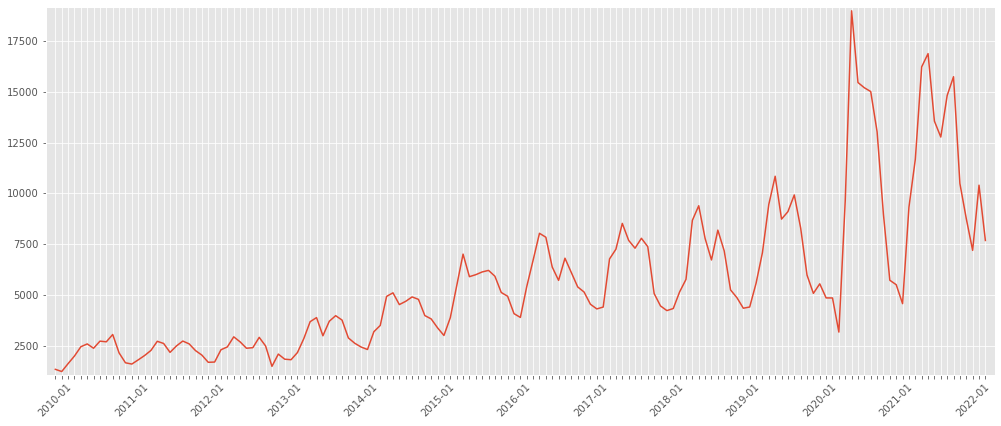

In [57]:
x = df_2010_2021['Year_Month']
y = df_2010_2021['Total Complaints']
labels = xlabelsnew

plt.plot(x, y)

# You can specify a rotation for the tick labels in degrees or with keywords.
plt.rcParams["figure.figsize"] = (20,7)

plt.xticks(x, labels, rotation='vertical')

# Pad margins so that markers don't get clipped by the axes
plt.margins(0.01)
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)
plt.tick_params(axis='x', labelrotation = 45)
plt.show()

In [58]:
m = [x for x in df_2010_2021['Total Complaints']]

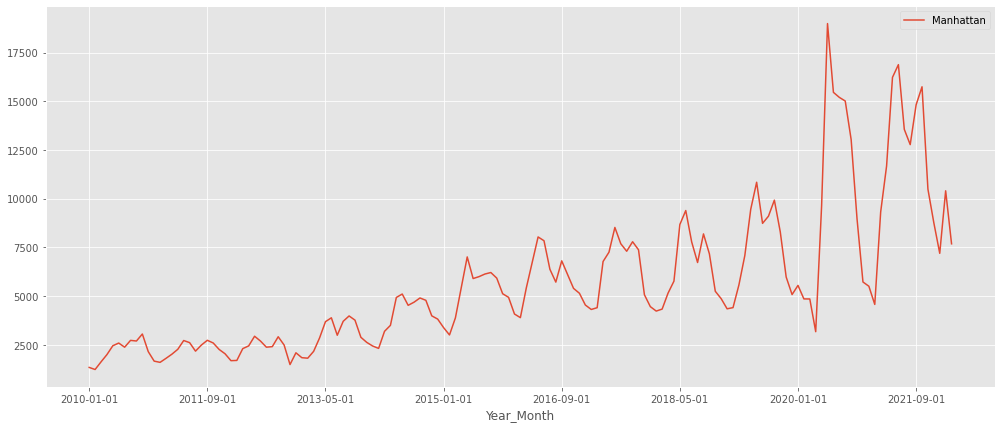

In [505]:
df = pd.DataFrame({
   'Manhattan': m
   }, index=df_2010_2021['Year_Month'])
lines = df.plot.line()

Text(0, 0.5, 'Volume of Complaints')

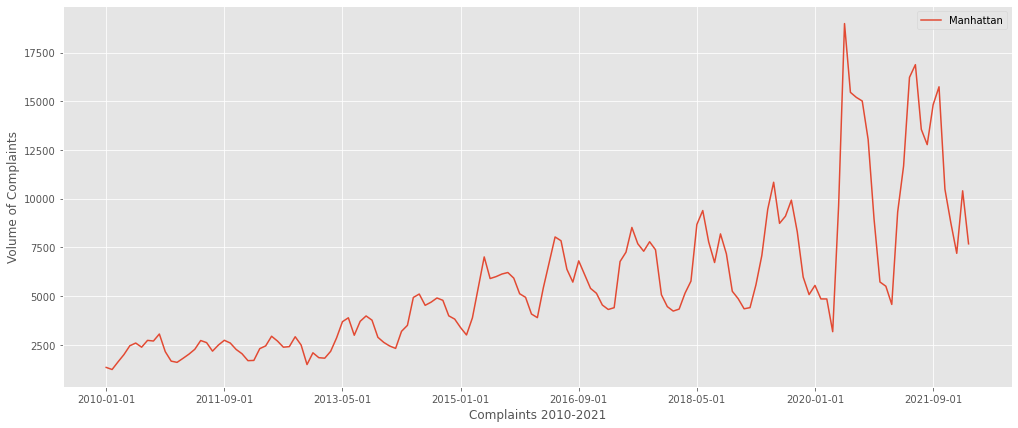

In [301]:
import matplotlib.dates as mdates
df = pd.DataFrame({
   'Manhattan': m
   }, index=df_2010_2021['Year_Month'])
lines = df.plot.line()
plt.xlabel("Complaints 2010-2021")
plt.ylabel("Volume of Complaints")

In [60]:
years = [2018, 2019, 2020, 2021]

In [61]:
df_2018_2021 = data[data['Year'].isin(years)]

In [62]:
df_2018_2021 = df_2018_2021.groupby('Year_Month')[['Unique Key']].count()

In [63]:
df_2018_2021.rename(columns={'Unique Key': 'Total Complaints'}, inplace=True)

In [64]:
df_2018_2021.reset_index(inplace=True)

In [65]:
ll = [x[:7] for x in df_2018_2021['Year_Month'].astype(str)]

In [66]:
import re
xxlabelsnew = []
for i in ll:
    if re.search('....-01', i) != None:
        xxlabelsnew.append(i)
    elif re.search('....-07', i) != None:
        xxlabelsnew.append(i)      
    else:
        xxlabelsnew.append(' ')

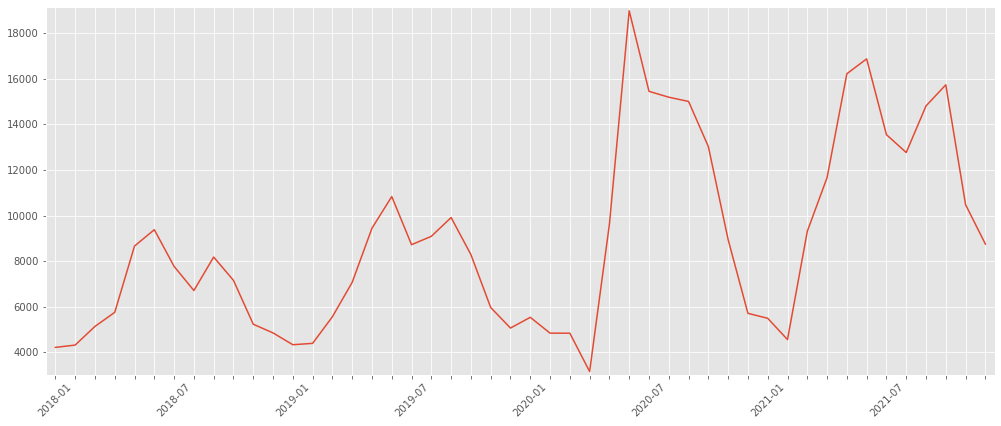

In [77]:
x = df_2018_2021['Year_Month']
y = df_2018_2021['Total Complaints']
labels = xxlabelsnew

plt.plot(x, y)

# You can specify a rotation for the tick labels in degrees or with keywords.
plt.rcParams["figure.figsize"] = (17,7)

plt.xticks(x, labels, rotation='vertical')

# Pad margins so that markers don't get clipped by the axes
plt.margins(0.01)
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)
plt.tick_params(axis='x', labelrotation = 45)
plt.show()

In [ ]:
'''

bring in comparison of staten island, borough with the lowest amount of open dining restaurants for
comparison on noise/waste/parking complaints

'''

In [68]:
si = pd.read_csv('311_Service_Requests_from_2010_to_Present_SI_2.csv')

In [70]:
# si = si.drop('Unnamed: 0', axis = 1)
si

Year_Month  Total Complaints
0    2010-01-01               319
1    2010-02-01               272
2    2010-03-01               388
3    2010-04-01               427
4    2010-05-01               430
5    2010-06-01               630
6    2010-07-01               603
7    2010-08-01               632
8    2010-09-01               666
9    2010-10-01               608
10   2010-11-01               504
11   2010-12-01               531
12   2011-01-01               765
13   2011-02-01               679
14   2011-03-01               670
15   2011-04-01               544
16   2011-05-01               617
17   2011-06-01               698
18   2011-07-01               652
19   2011-08-01               514
20   2011-09-01               670
21   2011-10-01               561
22   2011-11-01               499
23   2011-12-01               477
24   2012-01-01               501
25   2012-02-01               521
26   2012-03-01               591
27   2012-04-01               564
28   2012-05-01               611
29   2012-06-01               628
30   2012-07-01               625
31   2012-08-01               585
32   2012-09-01               635
33   2012-10-01               507
34   2012-11-01               373
35   2012-12-01               443
36   2013-01-01               507
37   2013-02-01               544
38   2013-03-01               654
39   2013-04-01               772
40   2013-05-01               689
41   2013-06-01               683
42   2013-07-01               776
43   2013-08-01               776
44   2013-09-01               777
45   2013-10-01               691
46   2013-11-01               558
47   2013-12-01               581
48   2014-01-01               616
49   2014-02-01               819
50   2014-03-01               847
51   2014-04-01               800
52   2014-05-01               794
53   2014-06-01              1015
54   2014-07-01               924
55   2014-08-01              1013
56   2014-09-01               971
57   2014-10-01               924
58   2014-11-01               734
59   2014-12-01               794
60   2015-01-01               746
61   2015-02-01               809
62   2015-03-01              1077
63   2015-04-01               945
64   2015-05-01              1062
65   2015-06-01              1173
66   2015-07-01              1185
67   2015-08-01              1262
68   2015-09-01              1173
69   2015-10-01              1049
70   2015-11-01              1075
71   2015-12-01              1007
72   2016-01-01              1015
73   2016-02-01               922
74   2016-03-01              1117
75   2016-04-01              1127
76   2016-05-01              1215
77   2016-06-01              1406
78   2016-07-01              1219
79   2016-08-01              1256
80   2016-09-01              1263
81   2016-10-01              1276
82   2016-11-01              1122
83   2016-12-01              1181
84   2017-01-01              1139
85   2017-02-01              1127
86   2017-03-01              1297
87   2017-04-01              1366
88   2017-05-01              1393
89   2017-06-01              1575
90   2017-07-01              1573
91   2017-08-01              1415
92   2017-09-01              1510
93   2017-10-01              1407
94   2017-11-01              1375
95   2017-12-01              1233
96   2018-01-01              1380
97   2018-02-01              1214
98   2018-03-01              1340
99   2018-04-01              1383
100  2018-05-01              1667
101  2018-06-01              1757
102  2018-07-01              1695
103  2018-08-01              1501
104  2018-09-01              1593
105  2018-10-01              1489
106  2018-11-01              1367
107  2018-12-01              1516
108  2019-01-01              1498
109  2019-02-01              1498
110  2019-03-01              1618
111  2019-04-01              1551
112  2019-05-01              1895
113  2019-06-01              1922
114  2019-07-01              1290
115  2019-08-01              1639
116  2019-09-01            

In [71]:
m_si = pd.merge(df_2010_2021, si, on='Year_Month')
m_si['Total Complaints_x']

0       1329
1       1222
2       1612
3       1986
4       2442
5       2581
6       2367
7       2718
8       2685
9       3045
10      2140
11      1652
12      1589
13      1794
14      2008
15      2259
16      2710
17      2602
18      2165
19      2479
20      2722
21      2583
22      2252
23      2030
24      1676
25      1688
26      2294
27      2434
28      2930
29      2683
30      2368
31      2396
32      2904
33      2480
34      1476
35      2080
36      1829
37      1803
38      2155
39      2841
40      3678
41      3877
42      2981
43      3696
44      3972
45      3756
46      2875
47      2613
48      2427
49      2306
50      3183
51      3490
52      4922
53      5097
54      4518
55      4679
56      4895
57      4775
58      3977
59      3811
60      3373
61      2996
62      3873
63      5432
64      7003
65      5893
66      5991
67      6125
68      6202
69      5915
70      5113
71      4928
72      4072
73      3885
74      5405
75      6705
76      8029

In [73]:
m = [x for x in m_si['Total Complaints_x']]

In [74]:
si = [y for y in m_si['Total Complaints_y']]

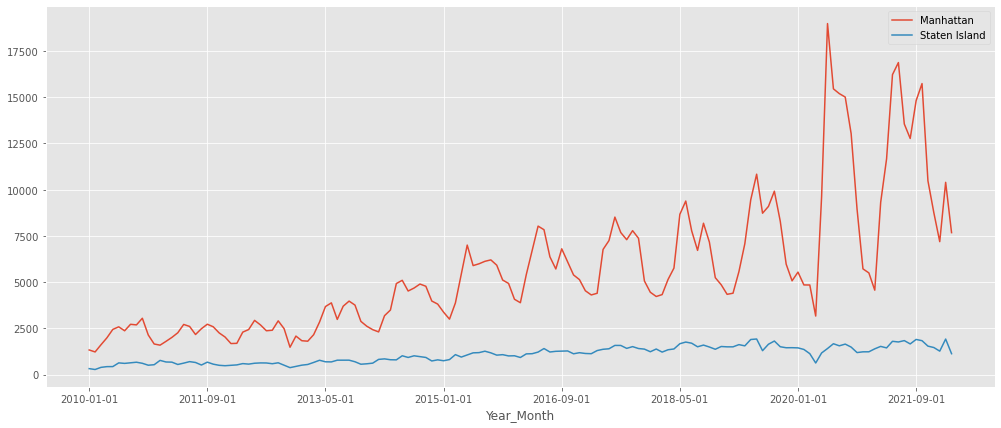

In [75]:
df = pd.DataFrame({
   'Manhattan': m,
   'Staten Island': si
   }, index=m_si['Year_Month'])
lines = df.plot.line()

Text(0, 0.5, 'Volume of Complaints')

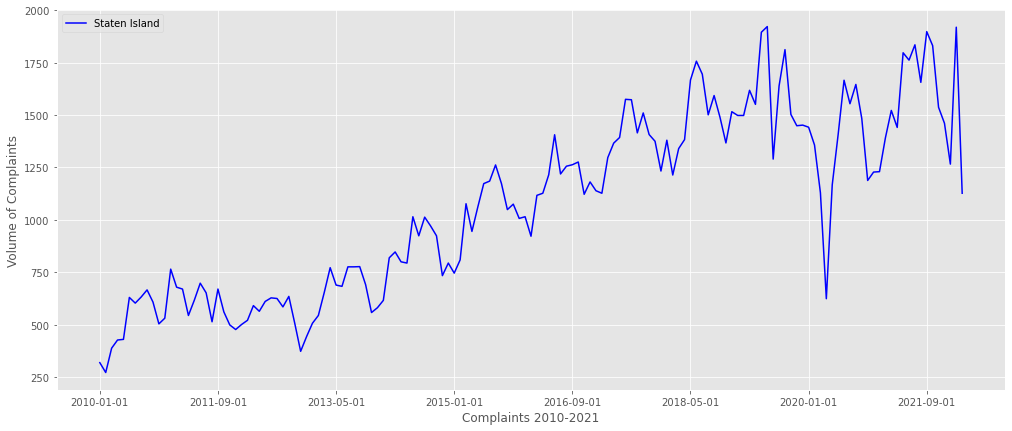

In [304]:
df = pd.DataFrame({
   'Staten Island': si
   }, index=m_si['Year_Month'])
lines = df.plot.line(color='b')
plt.xlabel("Complaints 2010-2021")
plt.ylabel("Volume of Complaints")

In [78]:
data.shape

(833846, 26)

<AxesSubplot:xlabel='Complaint Type'>

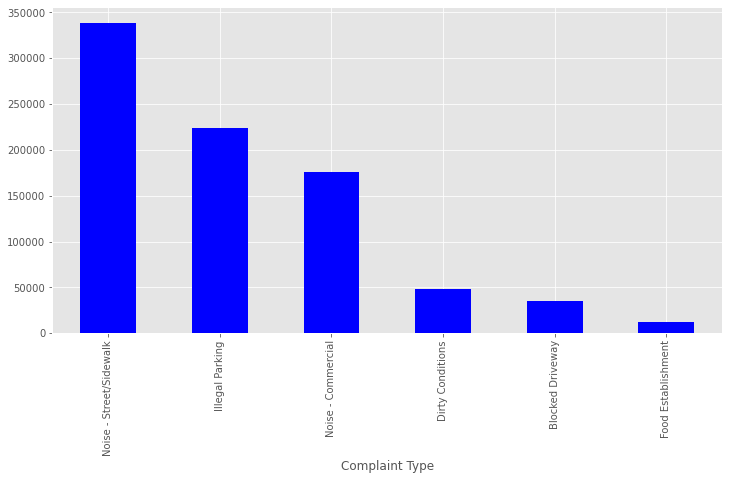

In [79]:
plt.figure(figsize = (12,6))
data.groupby('Complaint Type')['Unique Key'].count().sort_values(ascending=False).plot.bar(color = 'b')

In [ ]:
#consolidate complaint category into 3: 1)Noise 2)Blocked Driveway/Illegal Parking 3)Dirty Conditions

In [94]:
data.groupby(['Complaint Type','Descriptor'])[['Unique Key']].count()

Unique Key
Complaint Type          Descriptor                                  
Blocked Driveway        No Access                              27074
                        Partial Access                          7557
Dirty Conditions        E1 Improper Disposal                    6214
                        E11 Litter Surveillance                 1312
                        E12 Illegal Dumping Surveillance        2354
                        E13 Throw-Out                            293
                        E1A Litter Basket / Improper Use         928
                        E2 Receptacle Violation                 2880
                        E3 Dirty Sidewalk                      23280
                        E3A Dirty Area/Alleyway                 3356
                        E3B Sidewalk Obstruction                  83
                        E5 Loose Rubbish                        2805
                        E7 Private Carter Spillage                79
                        Rodents/Insects/Garbage                11248
                        Trash                                   4178
Illegal Parking         Blocked Bike Lane                      27443
                        Blocked Crosswalk                       1152
                        Blocked Hydrant                        35446
                        Blocked Sidewalk                       24727
                        Double Parked Blocking Traffic         25111
                        Double Parked Blocking Vehicle         17757
                        Parking Permit Improper Use             5843
                        Posted Parking Sign Violation          80216
Noise - Commercial      Banging/Pounding                       18702
                        Car/Truck Horn                          3090
                        Car/Truck Music                         3737
                        Loud Music/Party                      135065
                        Loud Talking                           15234
                        Loud Television                          311
Noise - Street/Sidewalk Loud Music/Party                      255415
                        Loud Talking                           83537

In [89]:
data = data[data['Descriptor'] != 'Permit/License/Certificate']

In [93]:
#consolidate Food/Dirty Complaints into Dirty Condition/s category
data.loc[data['Complaint Type'] == 'Food Establishment', 'Complaint Type'] = 'Dirty Conditions'

In [95]:
conditions = [
    (data['Complaint Type'] == 'Blocked Driveway')|(data['Complaint Type'] == 'Illegal Parking'),
    (data['Complaint Type'] == 'Dirty Conditions'),
    (data['Complaint Type'] == 'Noise - Commercial')|(data['Complaint Type'] == 'Noise - Street/Sidewalk')
]

In [96]:
values = ['Blocked Driveway/Illegal Parking', 'Dirty Conditions', 'Noise']

In [103]:
data['Complaints'] = np.select(conditions, values)

In [203]:
df1 = data[data['Complaints'] == 'Blocked Driveway/Illegal Parking']
df2 = data[data['Complaints'] == 'Dirty Conditions']
df3 = data[data['Complaints'] == 'Noise']

In [183]:
# data.drop('Unnamed: 0', axis = 1, inplace=True)

In [204]:
df1 = df1.reset_index()
df2 = df2.reset_index()
df3 = df3.reset_index()

In [205]:
df1 = df1.groupby('Year_Month')['Unique Key'].count()
df2 = df2.groupby('Year_Month')['Unique Key'].count()
df3 = df3.groupby('Year_Month')['Unique Key'].count()

In [206]:
df1 = df1.reset_index()
df2 = df2.reset_index()
df3 = df3.reset_index()

In [207]:
b = [x for x in df1['Unique Key']]
d = [x for x in df2['Unique Key']]
n = [x for x in df3['Unique Key']]

In [461]:
df3

Year_Month  Unique Key
0    2010-01-01         942
1    2010-02-01         861
2    2010-03-01        1176
3    2010-04-01        1590
4    2010-05-01        1981
..          ...         ...
143  2021-12-01        3729
144  2022-01-01        2544
145  2022-02-01        2742
146  2022-03-01        4359
147  2022-04-01        3619

[148 rows x 2 columns]

In [488]:
a = pd.merge(df1,df2, on='Year_Month')

In [489]:
b = pd.merge(a,df3, on='Year_Month')

In [490]:
b.reset_index(inplace=True)

In [491]:
#create a year column from the Created Date
b['Year'] = pd.DatetimeIndex(b['Year_Month']).year

In [492]:
y = [2017, 2018, 2019, 2020, 2021, 2022]

In [493]:
b = b[b['Year'].isin(y)]

In [494]:
b.rename(columns={'Unique Key_x':'Blocked Driveway/Illegal Parking','Unique Key_y':'Dirty Conditions', 'Unique Key':'Noise'}, inplace=True)

In [495]:
bb = [x for x in b['Blocked Driveway/Illegal Parking']]
dd = [x for x in b['Dirty Conditions']]
nn = [x for x in b['Noise']]

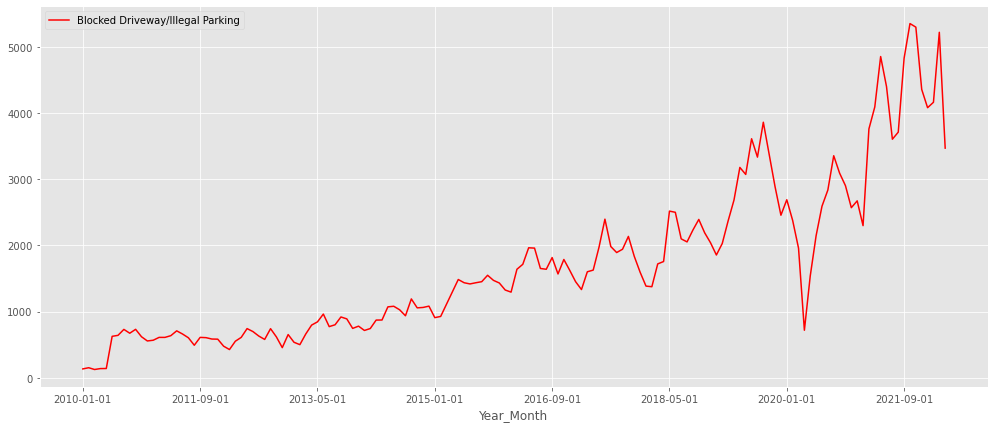

In [455]:
df_comp = pd.DataFrame({
   'Blocked Driveway/Illegal Parking': b
   }, index=df1['Year_Month'])
comp_lines = df_comp.plot.line(color = 'r')

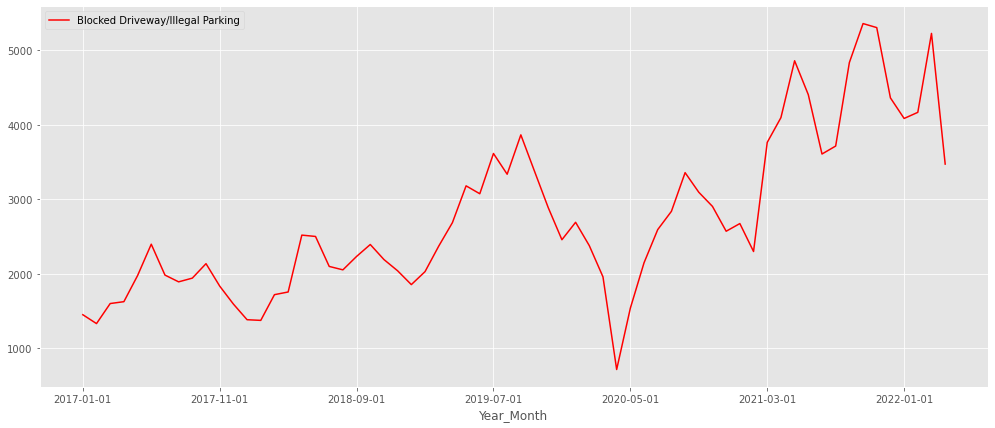

In [496]:
df_comp = pd.DataFrame({
   'Blocked Driveway/Illegal Parking': bb
   }, index=b['Year_Month'])
comp_lines = df_comp.plot.line(color = 'r')

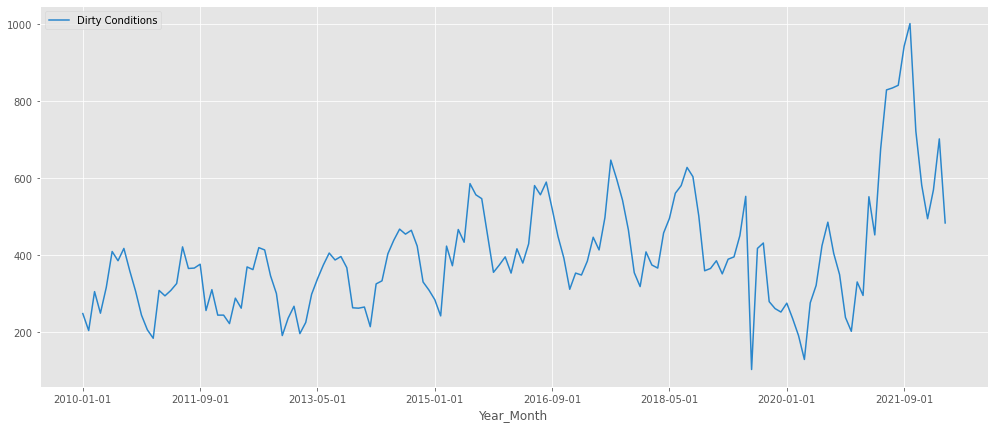

In [230]:
df_comp = pd.DataFrame({
   'Dirty Conditions': d,
   }, index=df1['Year_Month'],)
comp_lines = df_comp.plot.line(color='#2986cc')

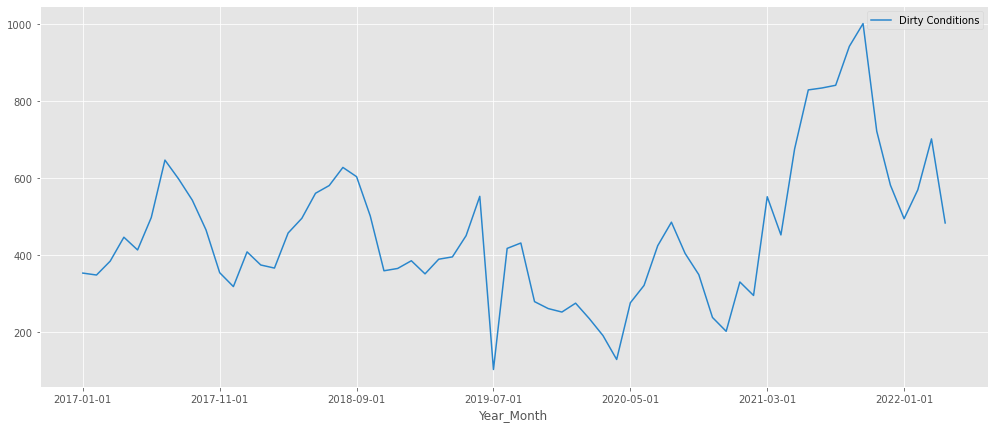

In [497]:
df_comp = pd.DataFrame({
   'Dirty Conditions': dd,
   }, index=b['Year_Month'],)
comp_lines = df_comp.plot.line(color='#2986cc')

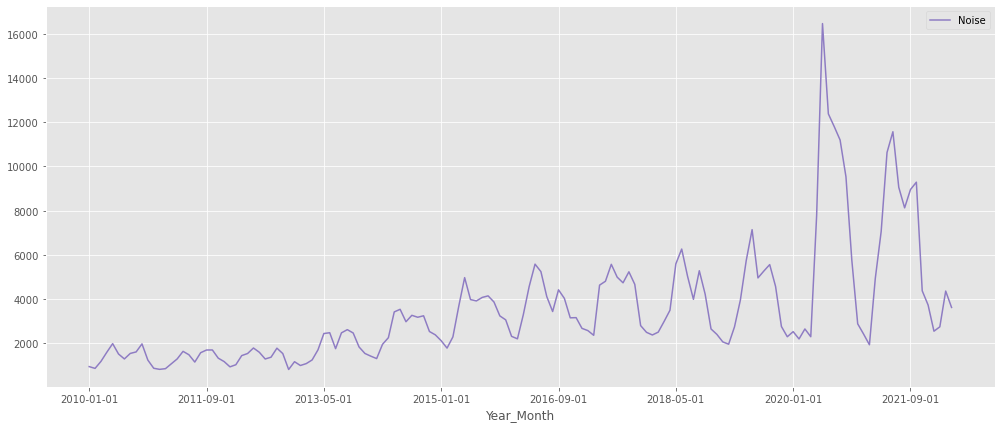

In [486]:
df_comp = pd.DataFrame({
   'Noise': n
   }, index=df1['Year_Month'])
comp_lines = df_comp.plot.line(color='#8e7cc3')

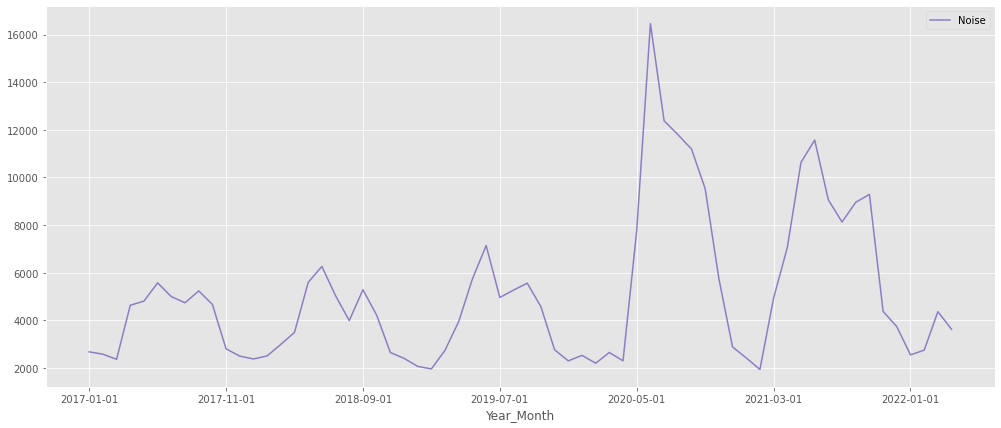

In [498]:
df_comp = pd.DataFrame({
   'Noise': nn
   }, index=b['Year_Month'])
comp_lines = df_comp.plot.line(color='#8e7cc3')

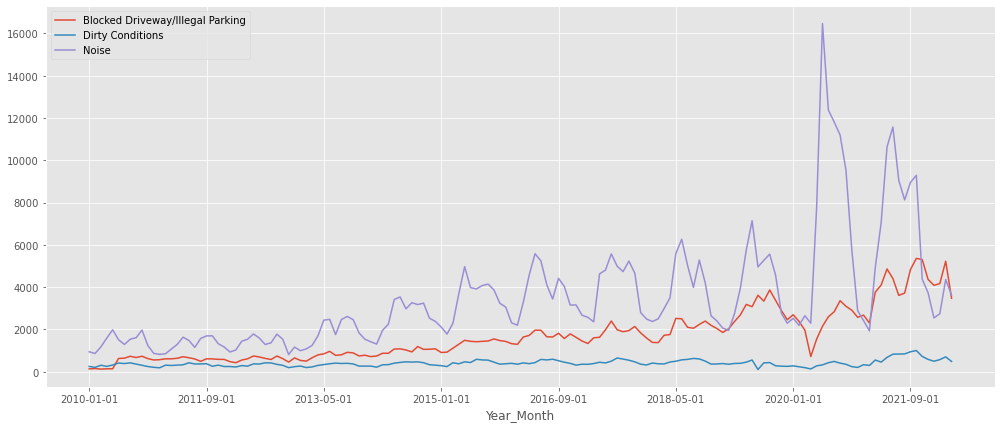

In [227]:
df_comp = pd.DataFrame({
   'Blocked Driveway/Illegal Parking': b,
   'Dirty Conditions': d,
   'Noise': n
   }, index=df1['Year_Month'])
comp_lines = df_comp.plot.line()

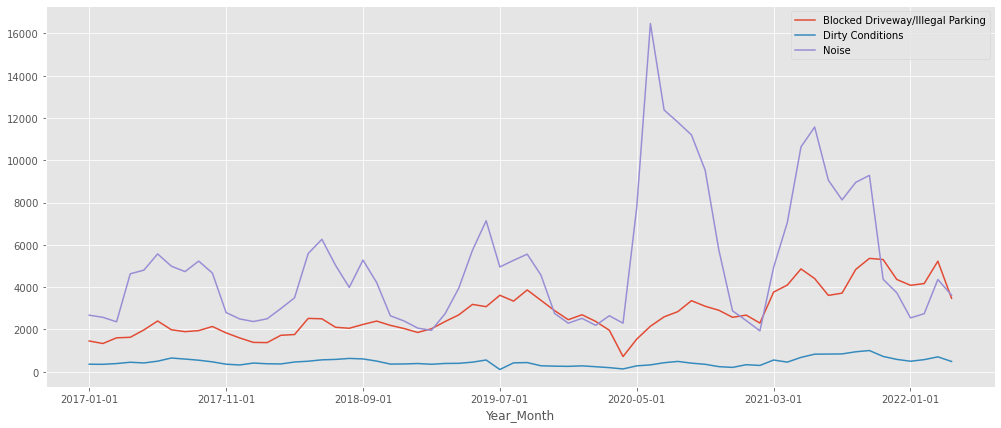

In [499]:
df_comp = pd.DataFrame({
   'Blocked Driveway/Illegal Parking': bb,
   'Dirty Conditions': dd,
   'Noise': nn
   }, index=b['Year_Month'])
comp_lines = df_comp.plot.line()

In [232]:
data.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Address Type', 'City', 'Landmark',
       'Status', 'Resolution Description', 'Resolution Action Updated Date',
       'Borough', 'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Latitude', 'Longitude', 'Location', 'Year', 'Month', 'Year_Month',
       'Complaints'],
      dtype='object')

In [416]:
df_2020_2021 = data[data['Year'].isin([2020, 2021])]

In [418]:
df_2020_2021 = df_2020_2021[['Incident Zip', 'Unique Key']]

In [419]:
df_2020_2021 = df_2020_2021.apply (pd.to_numeric, errors='coerce')
# df_2020_2021 = df_2020_2021.dropna()

In [420]:
df_2020_2021 = df_2020_2021.dropna()

In [428]:
df_2020_2021['Incident Zip'] = df_2020_2021['Incident Zip'].astype(int)

In [436]:
df_2020_2021.groupby('Incident Zip')[['Unique Key']].count()

Unique Key
Incident Zip            
83                     3
10000                 86
10001               4472
10002              13277
10003               6608
...                  ...
10280                216
10281                 52
10282                209
10463                301
12345                 64

[88 rows x 1 columns]

In [439]:
df_2020_2021 = df_2020_2021.groupby('Incident Zip')[['Unique Key']].count().sort_values(by='Unique Key', ascending=False)

In [440]:
df_2020_2021.reset_index(inplace=True)

In [441]:
df_2020_2021

Incident Zip  Unique Key
0          10034       22109
1          10032       20833
2          10040       17656
3          10031       17453
4          10002       13277
..           ...         ...
83         10122           1
84         10177           1
85         10174           1
86         10173           1
87         10055           1

[88 rows x 2 columns]

<AxesSubplot:xlabel='Complaints,Year'>

<Figure size 864x432 with 0 Axes>

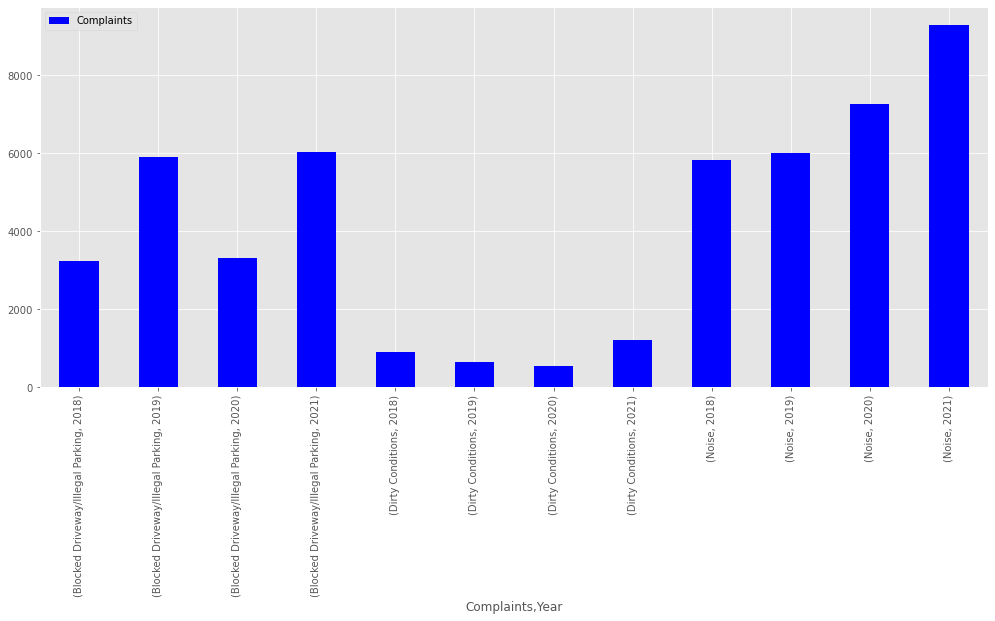

In [282]:
# df_20_21_high.plot(kind='bar')

plt.figure(figsize = (12,6))
df_20_21_high.plot.bar(color = 'b')

In [238]:
col_list = ["objectid", "Seating Interest (Sidewalk/Roadway/Both)", 
            "Restaurant Name", "Borough", "Postcode", "Sidewalk Dimensions (Area)",
            "Roadway Dimensions (Area)", "Qualify Alcohol"]
df_app = pd.read_csv("Open_Restaurant_Applications.csv", usecols=col_list)

In [247]:
df_app = df_app[df_app['Borough'] == 'Manhattan']

In [306]:
#areas with highest amount of open dining
app_zip = df_app.groupby('Postcode')[['objectid']].count().sort_values(by='objectid', ascending=False)

In [252]:
# low = df_app.groupby('Postcode')[['objectid']].count().sort_values(by='objectid', ascending=False)

In [307]:
#areas with lowest amount of open dining
# low[low['objectid'] > 10].tail(5)

In [356]:
app_zip.reset_index(inplace=True)

In [361]:
app_zip['Postcode']

0     10003
1     10012
2     10014
3     10013
4     10019
      ...  
90    10271
91    10305
92    11003
93    11038
94    30608
Name: Postcode, Length: 95, dtype: int64

In [442]:
rest_density_complaints = pd.merge(app_zip, df_2020_2021, left_on='Postcode', right_on='Incident Zip', how='inner')

In [443]:
rest_density_complaints

Postcode  objectid  Incident Zip  Unique Key
0      10003       561         10003        6608
1      10012       409         10012        4675
2      10014       404         10014        5525
3      10013       371         10013        4065
4      10019       327         10019        7213
..       ...       ...           ...         ...
55     10151         1         10151          33
56     10165         1         10165          11
57     10168         1         10168           6
58     10177         1         10177           1
59     10271         1         10271           2

[60 rows x 4 columns]

In [444]:
rest_density_complaints.rename(columns={'Unique Key': 'Total Complaints', 'objectid': 'Num of Restaurants'}, inplace=True)

In [454]:
rest_density_complaints.sort_values(by='Total Complaints', ascending=False).head(10)

Postcode  Num of Restaurants  Incident Zip  Total Complaints
25     10034                  76         10034             22109
32     10032                  45         10032             20833
27     10040                  66         10040             17656
26     10031                  70         10031             17453
5      10002                 325         10002             13277
29     10026                  63         10026             12007
30     10033                  61         10033             11655
22     10029                 104         10029             10568
8      10009                 292         10009             10358
28     10027                  65         10027             10138

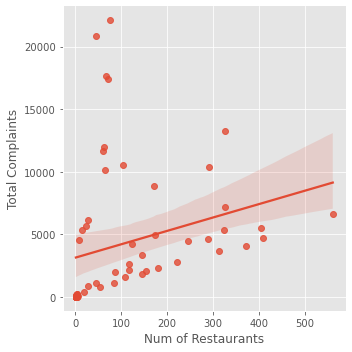

In [445]:
import seaborn as sns
sns.lmplot(x = "Num of Restaurants", y = "Total Complaints", data=rest_density_complaints)